<h1>EMPATHY PREDICTION USING MULTILAYER PERCEPTRON</h1>


<b>Dataset Information :</b> The dataset used is called Young People Survey Dataset taken from Kaggle website  (https://www.kaggle.com/miroslavsabo/young-people-survey/). It contains 1010 rows and 150 columns.

<b>Problem Statement :</b> You are working for a non-profit that is recruiting student volunteers to help with Alzheimer's patients. You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she is on the scale of 1 to 5.

<h3>Data Loading</h3>

First of all, let us import all the requied librabies to perform the tasks.

In [27]:
from imports import *

Let us import the data, to visualize the data. I have taken the first three rows by using head().

In [2]:
df1 = pd.read_csv('responses.csv')
df1.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


The following step demonstrates how data is encoded. For instance Male and Female are encoded as 1 and 0 respectively.

In [3]:
df1 = pp.encoder(df1)
df1.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,4,2,1,0,1,1,0,4,4,0,...,5,13,7,1,0,1,0,0,1,0
1,3,3,1,0,0,0,1,2,4,3,...,4,13,17,2,0,1,0,0,0,0
2,4,4,1,1,2,3,4,2,4,2,...,5,26,26,2,0,1,5,0,0,0


The following step is getting the features and labels from the data.
As out target variable is "Empathy" we store it in y and the rest of the features in X

In [4]:
y = df1[['Empathy']]
X = df1.drop(['Empathy'], axis=1)
print(X.shape)

(1010, 149)


<h2>Data PreProcessing</h2>

<h3>Feature Engineering</h3>
As a part of preprocessing we do the feature engineering, In this step, we extract the useful features and remove the features that are not needed for the learning algorithm as they do not help in the process of learning.
feature engineering is done in 2 parts,
<li>remove irrelavent features and </li>
<li>remove redundant features</li>

<h6>Removing Irrelavent Features</h6>

As a part of removing irrelavent features we find the features which do not relate to the predicted label, which in our case in 'Empathy'. We find the features which least co-relate with this, and remove them from our feature set.

This process is done in preprocessing.py where in the function 'removeIrrelaventFeatures' takes X and y, it the finds the corellation of each column in X with y and if the corelation value is less than 0.05 and more that -0.05 then that feture is removed from the feature set X.

In [5]:
print("So the most irrelavent features in the data set along with there corelation value with the label are:")
X = pp.removeIrrelaventFeatures(X,y)

So the most irrelavent features in the data set along with there corelation value with the label are:
Metal or Hardrock -0.005306006987761924
Punk 0.006677306945049051
Techno, Trance 0.009655029528743841
Sci-fi -0.012193749629684081
Economy Management -0.013801566888550465
Chemistry 0.007886959511276345
Geography -0.02472959997876068
Pets 0.004256075160531815
Funniness -0.010592133056907531
Criminal damage -0.02556569937238956
Hypochondria 5.3836644934251746e-05
Dreams -0.02457823762801862
Charity -0.007444283448857973
Number of friends 0.009557789489839336
Waiting -0.02111582935949294
New environment -0.010472201929576081
Socializing -0.0259021318406188
Assertiveness -0.01129631332366035
Knowing the right people 0.0088790603779004
Personality 0.006429094997064679
Entertainment spending 0.000594375889614876
Spending on looks -0.01564032999595924
Spending on healthy eating 0.005488543846521746
Left - right handed -0.013967924569835137
House - block of flats -0.02833422499232597


<h6>Removing redundant features</h6>

As a part of removing redundant features we find the features which are most similar to each other and only consider one feature instead of all related features. As we connsider one among all related features this does not effect the algorithm as the other are very closly co-related with this feature.

This process is taken care in preprocessing.py by the 'removeRedundantFeatues' function. It takes only one argument which is the feature set X. It then compares each feature to all the other featues and groups itas a set with the related features. Then it removes all the features except one from this set.

In [6]:
print("The most similar features in the data set are as follows:")
X = pp.removeRedundantFeatues(X)

The most similar features in the data set are as follows:
['Animated', 'Fantasy/Fairy tales']
['Medicine', 'Biology']
['Shopping centres', 'Shopping']
['Weight', 'Gender', 'Height']


<h3>Normalization</h3>

The next process in the Data preprocessing part is the Normalization of the data.
As a part of normalization I have done the following
<li>Centering</li>
<li>Feature Scaling</li>

<h6>Centering</h6>
In centering I have moved all the data to center, this is done by subtracting the mean of each feature from each of the feature value.

<h6>Feature Scaling</h6>
In feature scaling I have used the scaling with varience function so that each feature value is divided by the varience of the feature. This makes the data scaled to a unique level.

The task of normalization is accomplished by 'Normalization' function in preprocessing.py file. It takes the featue set X as input and returns the normalized X it it does the centering and feature engineering on it.

In [7]:
X = pp.Normalization(X)

<h3>Train/Test Data Splitting</h3>

The following step splits the data into test and training set. it splits in such a way that train data is 80% and test data is 20%.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

<h1>Machine Learning models</h1>
<h2>I) DECISION TREE<h2>

In [9]:
clf_dt = dt.DT(X_train,y_train)
clf_dt.fit(X_train, y_train)
predicted = clf_dt.predict(X_test)
print("Decision Tree Evaluations :\n")
print("Testing Accuracy => {}\n".format(clf_dt.score(X_test,y_test) * 100))
print("Confusion Matrix => \n{}\n".format(confusion_matrix(y_test, predicted)))
print("Classification Summary => \n{}\n".format(classification_report(y_test, predicted)))
print("F1 Score => {}\n".format(f1_score(y_test, predicted, average='binary')))

Decision Tree Evaluations :

Testing Accuracy => 64.35643564356435

Confusion Matrix => 
[[ 29  49]
 [ 23 101]]

Classification Summary => 
             precision    recall  f1-score   support

          0       0.56      0.37      0.45        78
          1       0.67      0.81      0.74       124

avg / total       0.63      0.64      0.62       202


F1 Score => 0.7372262773722629



<h4>Learning Curve</h4>

<module 'matplotlib.pyplot' from '/Users/saiishwaryachemarthi/anaconda3/envs/cs412New/lib/python3.6/site-packages/matplotlib/pyplot.py'>

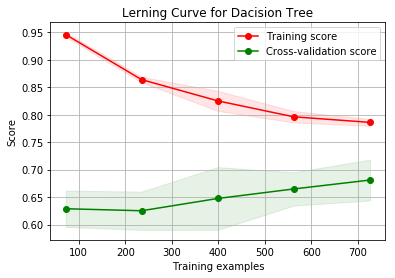

In [10]:
plot_learning_curve(clf_dt, "Lerning Curve for Dacision Tree", X_train, y_train, cv=10)

<h4>Validation Curve</h4>
Frome the next Validation curve we can observe that as the max_depth increse to aprox greater than 10, the data is overfitting, so the depth should be less than that in order to perform well.

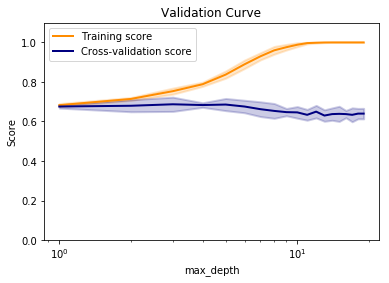

In [11]:
import math
plot_validation_curve(clf_dt,X_train,y_train,"max_depth",list(range(1,20)),5)

<h4>ROC Curve </h4>

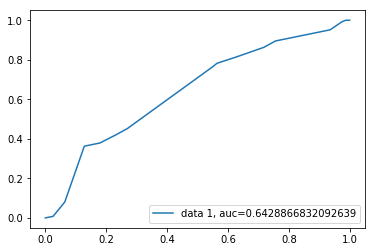

In [12]:
y_pred_proba = clf_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h2>II) SVM<h2>

In [13]:
clf_svm = svm.SVMkernal(X_train,y_train)
clf_svm.fit(X_train, y_train)
predicted = clf_svm.predict(X_test)
print("Support vector Machine Evaluations :\n")
print("Testing Accuracy => {}\n".format(clf_svm.score(X_test,y_test) * 100))
print("Confusion Matrix => \n{}\n".format(confusion_matrix(y_test, predicted)))
print("Classification Summary => \n{}\n".format(classification_report(y_test, predicted)))
print("F1 Score => {}\n".format(f1_score(y_test, predicted, average='binary')))

Support vector Machine Evaluations :

Testing Accuracy => 69.3069306930693

Confusion Matrix => 
[[ 25  53]
 [  9 115]]

Classification Summary => 
             precision    recall  f1-score   support

          0       0.74      0.32      0.45        78
          1       0.68      0.93      0.79       124

avg / total       0.70      0.69      0.66       202


F1 Score => 0.7876712328767123



<h4>Learning Curve</h4>
We can see that from the learning curve the cross-validation score is less than the training score i.e they dont converge as much of the other algorithms, this implies that we need more data to get a better generalization of the data in this model

<module 'matplotlib.pyplot' from '/Users/saiishwaryachemarthi/anaconda3/envs/cs412New/lib/python3.6/site-packages/matplotlib/pyplot.py'>

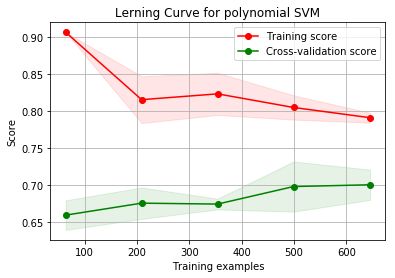

In [14]:
plot_learning_curve(clf_svm, "Lerning Curve for polynomial SVM", X_train, y_train, cv=5)

<h4>Validation Curve</h4>
As the gamma increse to aprox greater than 10, the data tends to overfitting, so the gamma should be less than that

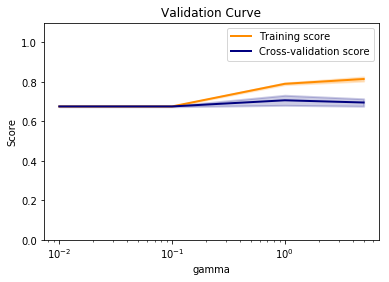

In [15]:
plot_validation_curve(clf_svm,X_train,y_train,"gamma",[0.01, 0.1, 1,5],5)

<h4>Validation Curve</h4>
As the degree increse to aprox greater than 5, the data is overfitting, so the degree should be less than that

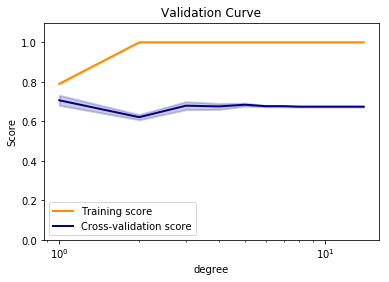

In [16]:
plot_validation_curve(clf_svm,X_train,y_train,"degree",list(range(1,15)),5)

<h4>ROC curve</h4>

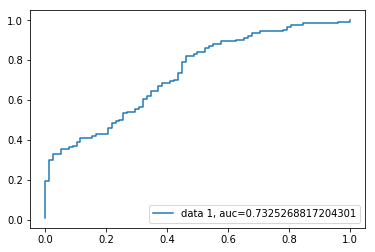

In [17]:
y_pred_proba = clf_svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h2>III) RANDOM FOREST<h2>

In [18]:
clf_rm = rf.randomForest(X_train,y_train,5)
clf_rm.fit(X_train, y_train)
predicted = clf_rm.predict(X_test)
print("Random Forest Evaluations :\n")
print("Testing Accuracy => {}\n".format(clf_rm.score(X_test,y_test) * 100))
print("Confusion Matrix => \n{}\n".format(confusion_matrix(y_test, predicted)))
print("Classification Summary => \n{}\n".format(classification_report(y_test, predicted)))
print("F1 Score => {}\n".format(f1_score(y_test, predicted, average='binary')))

Random Forest Evaluations :

Testing Accuracy => 64.85148514851485

Confusion Matrix => 
[[ 13  65]
 [  6 118]]

Classification Summary => 
             precision    recall  f1-score   support

          0       0.68      0.17      0.27        78
          1       0.64      0.95      0.77       124

avg / total       0.66      0.65      0.58       202


F1 Score => 0.7687296416938112



<h4>Learning curve</h4>
We can see that from the learning curve the cross-validation score is very less than the training score i.e they dont converge as much of the other algorithms, this implies that we need more data to get a better generalization of the data in this model

<module 'matplotlib.pyplot' from '/Users/saiishwaryachemarthi/anaconda3/envs/cs412New/lib/python3.6/site-packages/matplotlib/pyplot.py'>

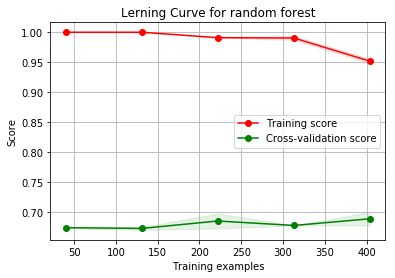

In [19]:
plot_learning_curve(clf_rm, "Lerning Curve for random forest", X_train, y_train, cv=2)

<h4>Validation Curve</h4>

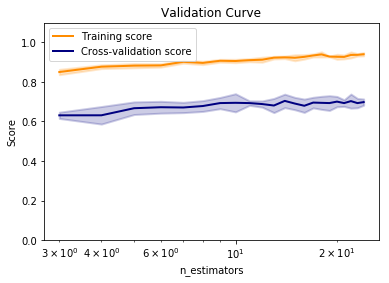

In [20]:
plot_validation_curve(clf_rm,X_train,y_train,"n_estimators",list(range(3,25)),5)

<h4>ROC Curve</h4>

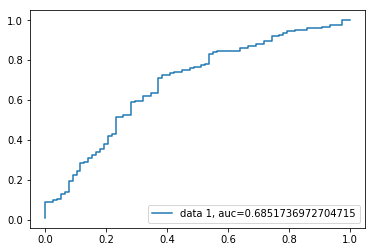

In [21]:
y_pred_proba = clf_rm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h2>IV) NAIVE BAYES<h2>

In [22]:
clf_GNB = nb.gaussianNB(X_train,y_train)
predicted = clf_GNB.predict(X_test)
print("Gaussian Navie Bayes Evaluations :\n")
print("Testing Accuracy => {}\n".format(clf_GNB.score(X_test,y_test) * 100))
print("Confusion Matrix => \n{}\n".format(confusion_matrix(y_test, predicted)))
print("Classification Summary => \n{}\n".format(classification_report(y_test, predicted)))
print("F1 Score => {}\n".format(f1_score(y_test, predicted, average='binary')))

Gaussian Navie Bayes Evaluations :

Testing Accuracy => 69.3069306930693

Confusion Matrix => 
[[41 37]
 [25 99]]

Classification Summary => 
             precision    recall  f1-score   support

          0       0.62      0.53      0.57        78
          1       0.73      0.80      0.76       124

avg / total       0.69      0.69      0.69       202


F1 Score => 0.7615384615384615



<h4>Learning Curve</h4>

<module 'matplotlib.pyplot' from '/Users/saiishwaryachemarthi/anaconda3/envs/cs412New/lib/python3.6/site-packages/matplotlib/pyplot.py'>

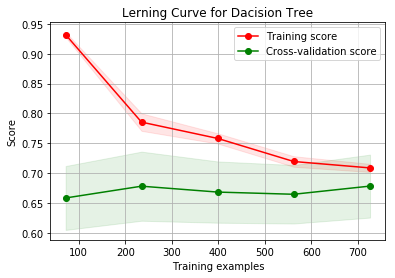

In [23]:
plot_learning_curve(clf_GNB, "Lerning Curve for Dacision Tree", X_train, y_train, cv=10)

As for Gausian Naive Bayes we dont have any hyperparamaters to tune there are no any validation curves for this.
<h4>ROC Curve</h4>

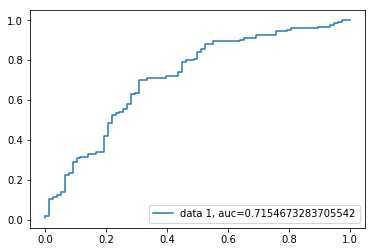

In [24]:
y_pred_proba = clf_GNB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()